In [77]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
	classification_report,
	confusion_matrix,
	roc_auc_score,
	roc_curve,
	precision_recall_curve,
	f1_score,
	precision_score,
	recall_score,
	accuracy_score,
)

warnings.filterwarnings("ignore")

In [78]:
seed = 42
np.random.seed(seed)

#### Loading the data

In [79]:
X_train = np.load("artifacts/X_train.npz")["arr_0"]
Y_train = np.load("artifacts/y_train.npz")["arr_0"]
X_test = np.load("artifacts/X_test.npz")["arr_0"]
Y_test = np.load("artifacts/y_test.npz")["arr_0"]

#### Model Training

In [80]:
model_lr = LogisticRegression(
	random_state=42,
	max_iter=1000,
)

model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Inference

In [81]:
Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [82]:
pd.Series(Y_test).value_counts() #more bias towards class 0

0    1623
1     376
Name: count, dtype: int64

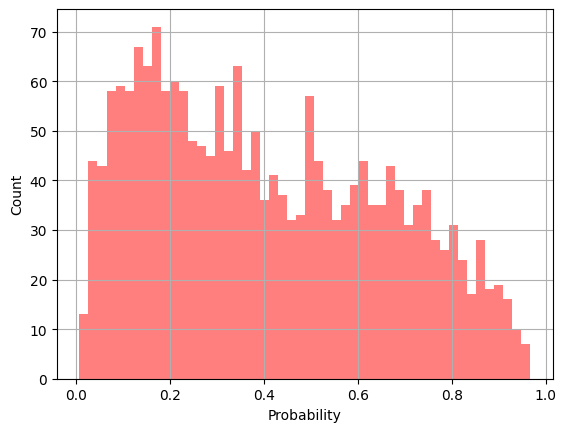

In [83]:
Y_lr_test = Y_proba_test[:, 1]
plt.hist(Y_lr_test, bins=50, color="red", alpha=0.5, label="Test")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.grid(True) #for a given x y been = 1

In [84]:
Y_proba_train

array([[0.83201964, 0.16798036],
       [0.91486415, 0.08513585],
       [0.74766146, 0.25233854],
       ...,
       [0.46479775, 0.53520225],
       [0.36867483, 0.63132517],
       [0.7050599 , 0.2949401 ]], shape=(12668, 2))

#### Evaluation

In [85]:
Y_hat_test = Y_lr_test > 0.4
Y_hat_test

array([False, False, False, ..., False, False,  True], shape=(1999,))

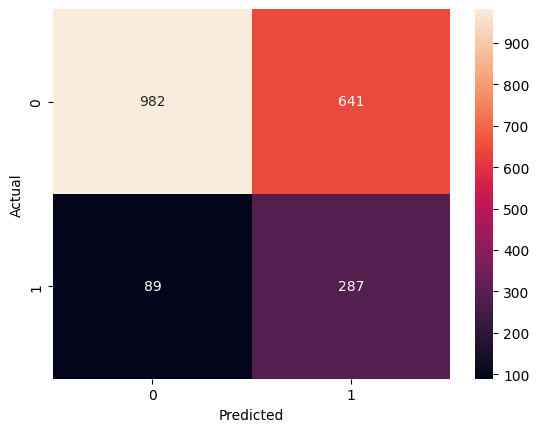

In [86]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()